## 目标：抽取文章中重要词汇并绘制词云
- 1.加载停用词
- 2.分词并去掉停用词、词形还原
- 3.取出名词、动词、形容词和副词四类实词
- 4.统计词频
- 5.画词云

In [1]:
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem.snowball import EnglishStemmer
from wordcloud import WordCloud

# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

stemmer = EnglishStemmer(ignore_stopwords=True)
stop_words = set(stopwords.words('english'))

%matplotlib inline

In [2]:
def frequency(content, poses):
    """
    1.分词并去掉停用词、词形还原
    2.词性筛选
    3.词频统计
    """
    words = re.split(r'[^a-zA-Z0-9-]+', content)
    dictory = {}
        
    for w in words:
        w = w.lower()
        w = stemmer.stem(w)
        if w in stop_words or w == '-' or len(w) <= 2:
            continue
        w_poses = set(synset.pos() for synset in wn.synsets(w))
        if not w_poses & poses:
            continue
        dictory[w] = dictory.get(w, 0) + 1
            
    return dictory

def plotword(words, num=20):
    """
    绘制词频结果
    """
    # sort
    words = sorted(words.items(), key=lambda x: x[1], reverse=True)
    cuv = [w[0] for w in words[:num]][::-1]
    apar = [w[1] for w in words[:num]][::-1]
    pos = range(num)

    plt.figure(1)
    plt.barh(pos, apar, align='center')
    plt.yticks(pos, cuv)
    plt.xlabel("frequency")
    
    plt.show()
    
def wordcloud(words, shape):
    """
    绘制词云
    """
    wc = WordCloud(max_words=2000,
                   width=400,
                   height=400,
                   mask=plt.imread(shape),
                   background_color="white",
                   margin=5)
    wc.generate_from_frequencies(words)
    plt.figure(figsize=(6, 6))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

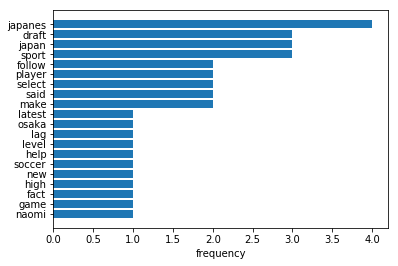

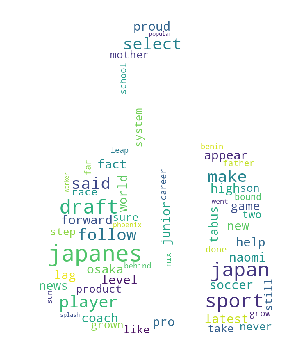

In [3]:
# [ADVERB, VERB, ADJECTIVE, NOUN] = [r, v, a, n]
# picture: https://blog.csdn.net/fly910905/article/details/77763086

testcase = 'The only other Japanese player drafted in NBA history was Yasutaka Okayama, \
            who went 171st overall in 1981. He never appeared in a regular-season game, something just two players \
            from the country have done: Yuta Tabuse for the Phoenix Suns in 2004-05, and Yuta Watanabe for the \
            Memphis Grizzlies in 2018-19. "The fact that Hachimura, a product of the Japanese basketball system, \
            has been selected in the NBA draft makes us very proud," said the Japan Basketball Federation\'s Yuko \
            Mitsuya. While it has grown in popularity with the introduction of a pro league in 2005, basketball \
            still lags far behind baseball and soccer in Japan. Hachimura\'s NBA career is sure to help the sport \
            grow in leaps and bounds. The son of a Japanese mother and father from the Republic of Benin, Hachimura \
            is the latest Japanese of mixed race to make a splash in the sporting world following the likes of Naomi \
            Osaka and Yu Darvish."This is a huge step forward for Japan," said Keisuke Tsutsumi, an office worker \
            who follows the NBA. "It will take the sport to a new level here." Hachimura\'s junior high school \
            coach Joji Sakamoto welcomed the news of his draft selection.'

words = frequency(testcase, {'n', 'v', 'a', 'r'})
plotword(words)
wordcloud(words, "man.jpeg")